# Model Development

Begin documenting models

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import string, re
import pandas_profiling
import itertools 
import local_modules.slack as slack
from progressbar import Bar, BouncingBar, Counter, ETA, \
    AdaptiveETA, FileTransferSpeed, FormatLabel, Percentage, \
    ProgressBar, ReverseBar, RotatingMarker, \
    SimpleProgress, Timer, UnknownLength
pbar = ProgressBar()
%store -r train_features   
%store -r test_features
%store -r train_labels
%store -r test_labels

In [9]:
train_features.describe()

,mean_pos,mean_neg,mean_neu,mean_comp,mean_brevity,var_pos,var_neg,var_neu,var_comp,var_brevity
count,11666.000000,11666.000000,11666.000000,11666.000000,11666.000000,11666.000000,11666.000000,11666.000000,11666.000000,11666.000000
mean,-0.001574,-0.001900,0.000470,0.001685,0.000516,0.000019,0.000126,-0.002055,-0.003079,-0.002389
std,1.001859,1.001466,1.002950,0.999586,1.003287,1.015532,1.000176,1.002070,0.999756,1.002265
min,-1.567748,-1.231870,-2.062887,-2.736960,-2.066096,-0.971959,-0.782630,-1.772377,-1.299517,-1.739571
25%,-0.674838,-0.702187,-0.591998,-0.594007,-0.581955,-0.649149,-0.652940,-0.369908,-0.523417,-0.306607
50%,-0.114089,-0.195896,-0.043646,0.065166,-0.062560,-0.241507,-0.334137,0.295879,-0.170830,0.300050
75%,0.540721,0.473166,0.619920,0.790638,0.601749,0.345403,0.263801,0.694188,0.414546,0.598856
max,5.129080,6.284208,2.589215,2.052655,4.526903,18.140452,12.954127,2.262017,3.833242,6.032057


In [10]:
train_labels.describe()

count    11666.000000
mean         0.635093
std          0.671481
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: label, dtype: float64

## Sample model #1: Random Forest

Testing a random forest model on predicting fake news

In [31]:
# Import the model we are using

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
classifier.fit(train_features, train_labels)

# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators = 1000, oob_score = True,
#                            bootstrap = True, random_state = 42) # Instantiate model with 1000 decision trees
# rf.fit(train_features, train_labels) # Train the model on training data
slack.SlackNotification('BK_slackbot', 'Random forest has finished training.')

In [32]:
predictions = classifier.predict(test_features)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predictions)

In [33]:
cm

array([[1254,  610,    9],
       [ 863,  720,   15],
       [ 254,  155,    9]])

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#     plt.tight_layout()

Confusion matrix, without normalization
[[1254  610    9]
 [ 863  720   15]
 [ 254  155    9]]


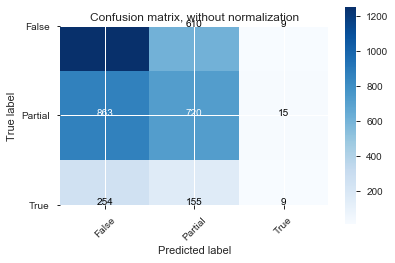

In [35]:
cnf_matrix = cm
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['False', 'Partial', 'True'],
                      title='Confusion matrix, without normalization')

In [36]:
from sklearn.metrics import accuracy_score
predictions = classifier.predict(test_features)
print("Training accuracy is: ", accuracy_score(train_labels, classifier.predict(train_features)))
print("Test accuracy is: ", accuracy_score(test_labels, predictions))

Training accuracy is:  0.9591976684381964
Test accuracy is:  0.5098997171509385


BAD MODEL

## Brute force models using Hunga Bunga

In [4]:
from local_modules.hunga_bunga import HungaBungaClassifier

In [ ]:
clf = HungaBungaClassifier(brain=True)
clf.fit(train_features, train_labels)

Scoring criteria: accuracy
--------------- model 1/15 ---------------
SGDClassifier
--------------- model 2/15 ---------------
LogisticRegression
--------------- model 3/15 ---------------
Perceptron
--------------- model 4/15 ---------------
PassiveAggressiveClassifier
--------------- model 5/15 ---------------
MLPClassifier
best score: 0.5143958868894601 time/clf: 2.819 seconds
best params:
{'activation': 'tanh',
 'batch_size': 50,
 'early_stopping': True,
 'hidden_layer_sizes': (64,),
 'learning_rate': 'invscaling',
 'max_iter': 500}
--------------- model 6/15 ---------------
KMeans
best score: 0.407369323050557 time/clf: 0.149 seconds
best params:
{'algorithm': 'elkan', 'init': 'random', 'n_clusters': 3}
--------------- model 7/15 ---------------
KNeighborsClassifier
--------------- model 8/15 ---------------
NearestCentroid
best score: 0.4011139674378749 time/clf: 0.004 seconds
best params:
{'metric': 'manhattan', 'shrink_threshold': 2}
--------------- model 9/15 ---------------
R